Download packages

In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
from sklego.meta import OrdinalClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import scipy
from sklearn.metrics import balanced_accuracy_score

In [2]:
random.seed(8)

Create new feature names to take the mean and std across epochs pr person

In [3]:
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]
print(mean_list)

['Delta_mean', 'Delta_N_mean', 'Theta_mean', 'Theta_N_mean', 'Alpha_mean', 'Alpha_N_mean', 'Beta_mean', 'Beta_N_mean', 'Gamma_mean', 'Gamma_N_mean', 'SE_mean', 'MSF_mean', 'Sef90_mean', 'Sef95_mean', 'PE_mean', 'wSMI_mean', 'Kolmogorov_mean', 'MeanRR_mean', 'StdRR_mean', 'MeanHR_mean', 'StdHR_mean', 'MinHR_mean', 'MaxHR_mean']


Concatenate data

In [4]:
path ='CSV_individual_cross_val/'
folder = os.fsencode(path)
renamed_markers_list = ['No.', 'Event', 'Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]


patient_numbers = []
r_data = []
m_data = []
f_data = []

all_data = []


for file in os.listdir(folder):
    filename = os.fsdecode(file)
    patient_numbers.append(filename[0:3])
    fname = path + filename
    data = pd.read_csv(fname)
    data.columns = renamed_markers_list
    all_data.append(data)



Ignore irrelevant warnings

In [5]:
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [6]:
print(patient_numbers)

['p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p27', 'p28', 'p29', 'p2_', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p3_', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p4_', 'p50', 'p51', 'p52', 'p53', 'p54', 'p56', 'p57', 'p58', 'p59', 'p5_', 'p60', 'p61', 'p62', 'p63', 'p65', 'p66', 'p67', 'p68', 'p69', 'p6_', 'p71', 'p72', 'p73', 'p74', 'p75', 'p77', 'p78', 'p79', 'p7_', 'p80', 'p8_', 'p9_']


In [7]:
all_data_as_df = pd.concat(all_data)

In [8]:
all_data_as_df

,No.,Event,Delta,Delta_N,Theta,Theta_N,Alpha,Alpha_N,Beta,Beta_N,...,wSMI,Kolmogorov,MeanRR,StdRR,MeanHR,StdHR,MinHR,MaxHR,freq_slope_mean,freq_slope_std
0,0,R,-96.121970,0.454753,-110.892058,0.090981,-117.658036,0.024413,-118.506408,0.017221,...,0.015387,0.068708,742.315789,7.461402,80.825572,0.674236,79.365079,81.967213,-3.160534,0.522777
1,1,R,-101.744454,0.453186,-110.612984,0.188763,-114.682428,0.051831,-117.877694,0.032676,...,0.017651,0.035544,726.600000,6.524448,82.572149,0.588805,81.521739,83.798883,-2.917758,0.448213
2,2,R,-100.903706,0.355699,-108.823103,0.178792,-117.221384,0.049087,-118.284459,0.040004,...,0.024921,0.052935,701.200000,16.826045,85.578587,1.863674,82.417582,89.285714,-3.317807,0.498665
3,0,M,-97.552636,0.393833,-106.916831,0.138586,-114.195308,0.021475,-118.103642,0.012307,...,0.013271,0.049539,710.600000,11.259616,84.458424,1.181598,81.521739,87.209302,-3.232139,0.532754
4,1,M,-100.044300,0.374745,-109.186659,0.130692,-112.891914,0.045537,-117.415955,0.038953,...,0.008337,0.066250,715.600000,8.792341,83.847009,0.865074,82.872928,86.206897,-3.172021,0.224302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,5,F,-96.626874,0.349498,-102.638731,0.139087,-108.018049,0.047970,-103.762347,0.138927,...,0.023413,0.031468,535.692308,106.726855,116.564057,8.387480,102.040816,153.061224,-3.474777,0.278822
19,6,F,-100.216072,0.413407,-101.303377,0.341309,-109.780213,0.076525,-112.512052,0.031990,...,0.016234,0.034957,527.407407,51.711671,114.029077,9.993331,100.000000,159.574468,-3.385828,0.365080
20,7,F,-98.363922,0.366497,-107.091176,0.152396,-112.568832,0.052457,-115.906216,0.023715,...,0.019330,0.027810,525.629630,48.246282,114.420733,9.569551,99.337748,154.639175,-3.476801,0.292024
21,8,F,-100.578681,0.258289,-102.793060,0.190906,-109.556235,0.072346,-107.163009,0.070396,...,0.013880,0.029828,523.407407,45.481407,114.927794,8.382736,102.739726,141.509434,-3.549598,0.452686


In [26]:
#check if the normalization is correct for psd
#data = all_data[0]
#print(data.loc[:,['Alpha_N', 'Delta_N', 'Theta_N', 'Beta_N']].sum(axis=1))
sums_list = []
for i, data in enumerate(all_data):
    sums = data.loc[:,['Alpha_N', 'Delta_N', 'Theta_N', 'Beta_N']].sum(axis=1)
    if i == 0:
        print(sums)
    sums_list.append(np.mean(sums))
print(sorted(sums_list))

0     0.587368
1     0.726456
2     0.623583
3     0.566200
4     0.589927
5     0.670140
6     0.679797
7     0.616101
8     0.592004
9     0.746552
10    0.614511
11    0.685383
12    0.773842
13    0.632885
14    0.650132
15    0.684674
16    0.686232
17    0.674048
18    0.655972
19    0.697379
20    0.694550
21    0.706002
22    0.525896
dtype: float64
[4.6297067470696836e-05, 0.00035277673078935005, 0.002342347884431087, 0.02063560064219084, 0.1599396371412033, 0.1821820172929033, 0.2159432668720203, 0.2788958379311664, 0.4306072037801271, 0.4459033607388733, 0.463269028901759, 0.47383119315864475, 0.48011602217766897, 0.49676729099161393, 0.5245615803376906, 0.5295083721003702, 0.5380407217895878, 0.5421796746274342, 0.5429519133916829, 0.548475367805615, 0.5528755451968201, 0.5560617400464933, 0.5561498206426555, 0.5589673411816759, 0.5605754648394876, 0.564476923717886, 0.570704059254715, 0.5744822800648852, 0.5747411690442236, 0.5756536855052048, 0.5875072103843408, 0.5883071

In [ ]:
alpha/(sum(alpha+beta+theta+delta))

In [10]:
A = set()
B = set()
C = set()
D = set()
numbers = []
for i, data in enumerate(all_data):
    
    if np.min(data['Delta']) < -300:
        A.add(patient_numbers[i])
        numbers.append(i)
    if np.min(data['Theta']) < -300:
        B.add(patient_numbers[i])
    if np.min(data['Alpha']) < -300:
        C.add(patient_numbers[i])
    if np.min(data['Beta']) < -300:
        D.add(patient_numbers[i])
print(sorted(A&B&C&D))
print(sorted(A))
print(sorted(B))
print(sorted(C))
print(sorted(D))
#['p25', 'p31', 'p34', 'p38', 'p61', 'p67', 'p68', 'p77']


['p25', 'p31', 'p34', 'p38', 'p61', 'p67', 'p68', 'p77']
['p25', 'p31', 'p34', 'p38', 'p61', 'p67', 'p68', 'p77']
['p25', 'p31', 'p34', 'p38', 'p61', 'p67', 'p68', 'p77']
['p25', 'p31', 'p34', 'p38', 'p61', 'p67', 'p68', 'p77']
['p25', 'p31', 'p34', 'p38', 'p61', 'p67', 'p68', 'p77']


In [12]:
A1 = set()
B1 = set()
C1 = set()
D1 = set()
E1 = set()
numbers = []
for i, data in enumerate(all_data):
    '', '', '', 'wSMI'
    if np.min(data['MSF']) == 0.0:
        A1.add(patient_numbers[i])
        numbers.append(i)
    if np.min(data['Sef90']) == 0.0:
        B1.add(patient_numbers[i])
    if np.min(data['Sef95']) == 0.0:
        C1.add(patient_numbers[i])
    if np.min(data['PE']) == 0.0:
        D1.add(patient_numbers[i])
    if np.min(data['wSMI']) == 0.0:
        E1.add(patient_numbers[i])
print(sorted(A1&B1&C1&D1&E1))
print(sorted(A1))
print(sorted(B1))
print(sorted(C1))
print(sorted(D1))
print(sorted(E1))

['p28', 'p30']
['p28', 'p30', 'p3_']
['p28', 'p30', 'p3_']
['p28', 'p30', 'p3_', 'p44']
['p28', 'p30']
['p28', 'p30', 'p3_']


In [57]:
for i in numbers:
    print(all_data[i]['MeanRR'])

0     573.920000
1     574.880000
2     529.185185
3     580.833333
4     581.760000
5     583.200000
6     576.333333
7     574.400000
8     578.080000
9     569.920000
10    519.259259
11    527.555556
12    529.925926
13    583.000000
14    584.800000
15    575.040000
16    573.600000
17    575.040000
18    568.640000
19    549.230769
20    540.296296
21    529.185185
22    525.428571
Name: MeanRR, dtype: float64
0     584.333333
1     587.000000
2     597.500000
3     600.869565
4     591.680000
5     579.520000
6     587.840000
7     592.800000
8     592.666667
9     592.833333
10    589.666667
11    599.333333
12    598.608696
13    598.500000
14    590.000000
15    591.833333
16    593.666667
17    591.500000
18    592.666667
19    586.000000
20    595.166667
21    593.333333
22    597.333333
Name: MeanRR, dtype: float64
0     648.000000
1     632.909091
2     650.363636
3     636.181818
4     647.454545
5     635.454545
6     642.363636
7     624.869565
8     601.166667
9     6

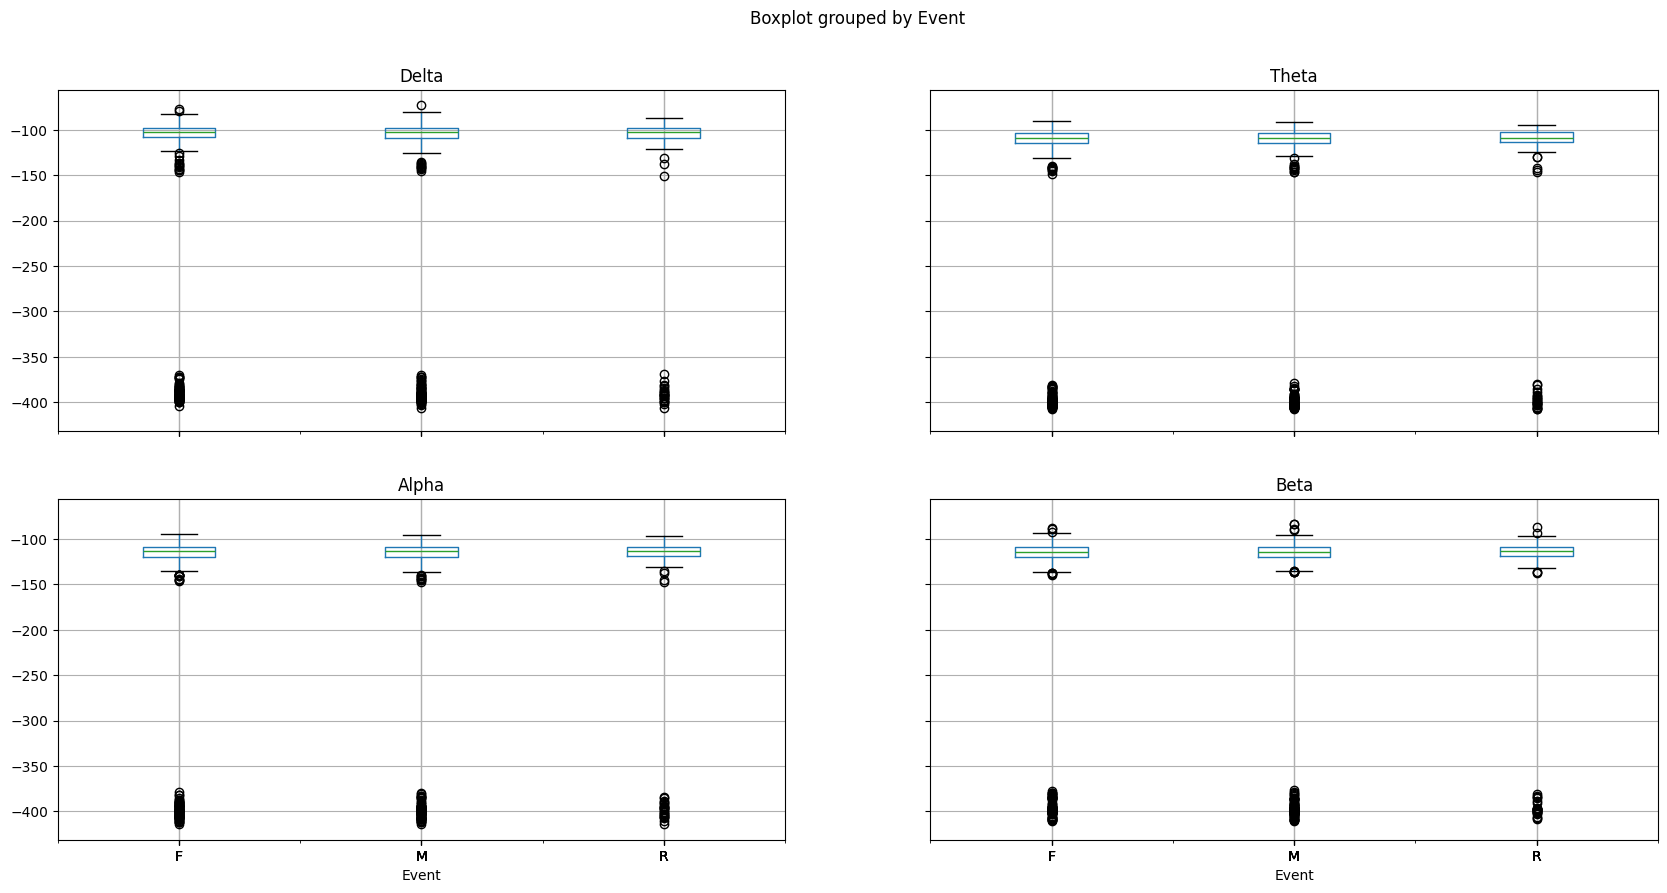

In [30]:
all_data_as_df.boxplot(column=['Delta','Theta', 'Alpha','Beta'], by='Event', figsize=(20,10))
plt.show()

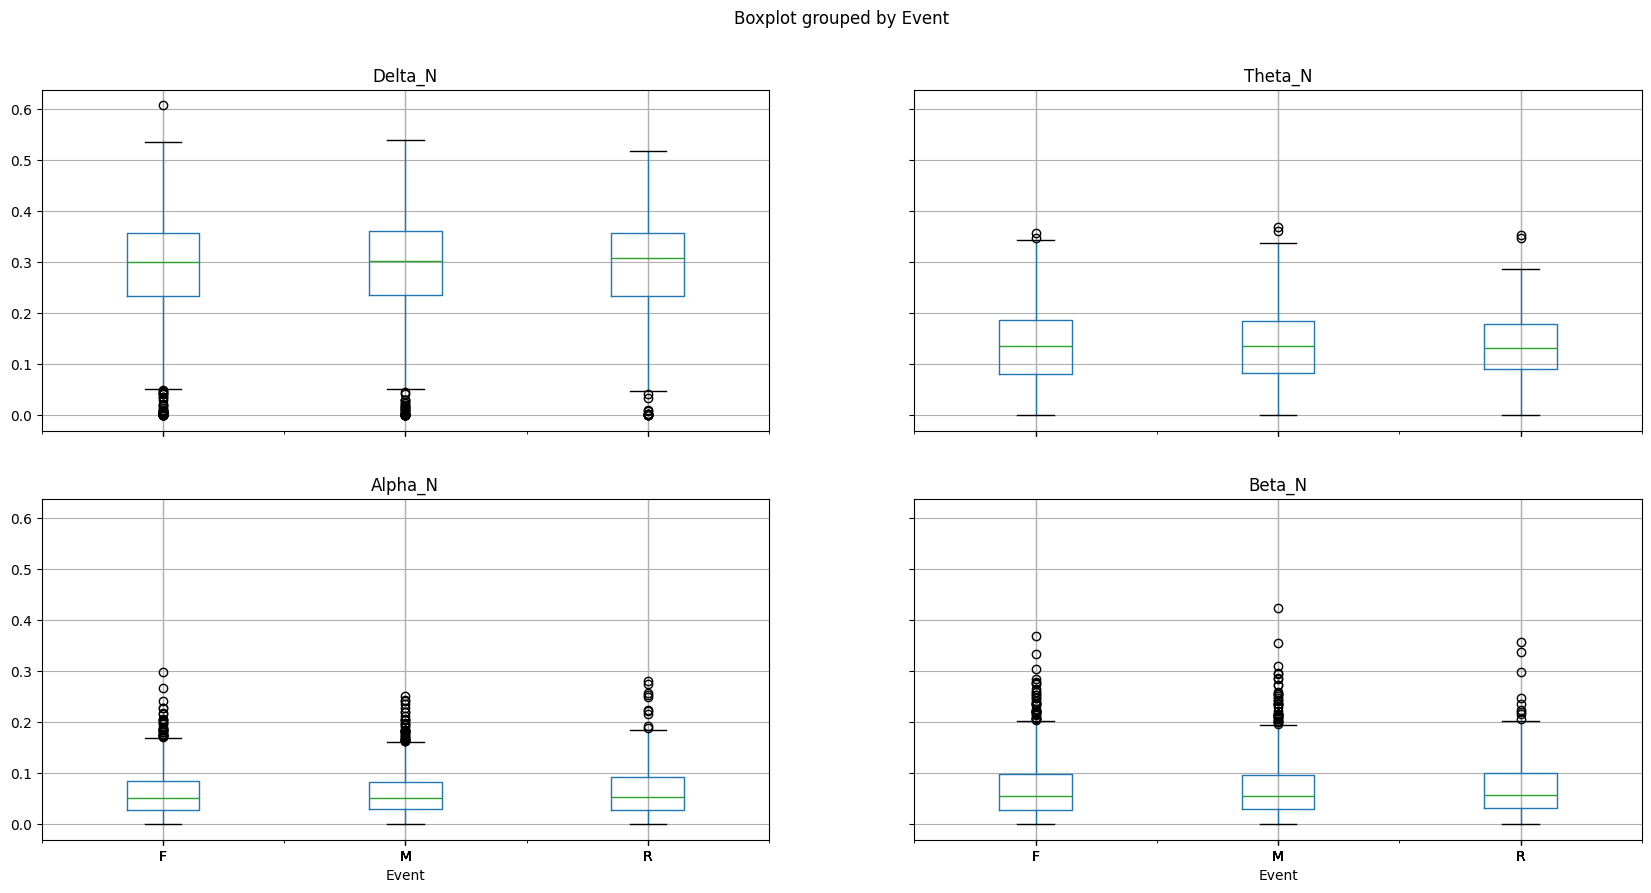

In [29]:
all_data_as_df.boxplot(column=['Delta_N','Theta_N', 'Alpha_N','Beta_N'], by='Event', figsize=(20,10))
plt.show()

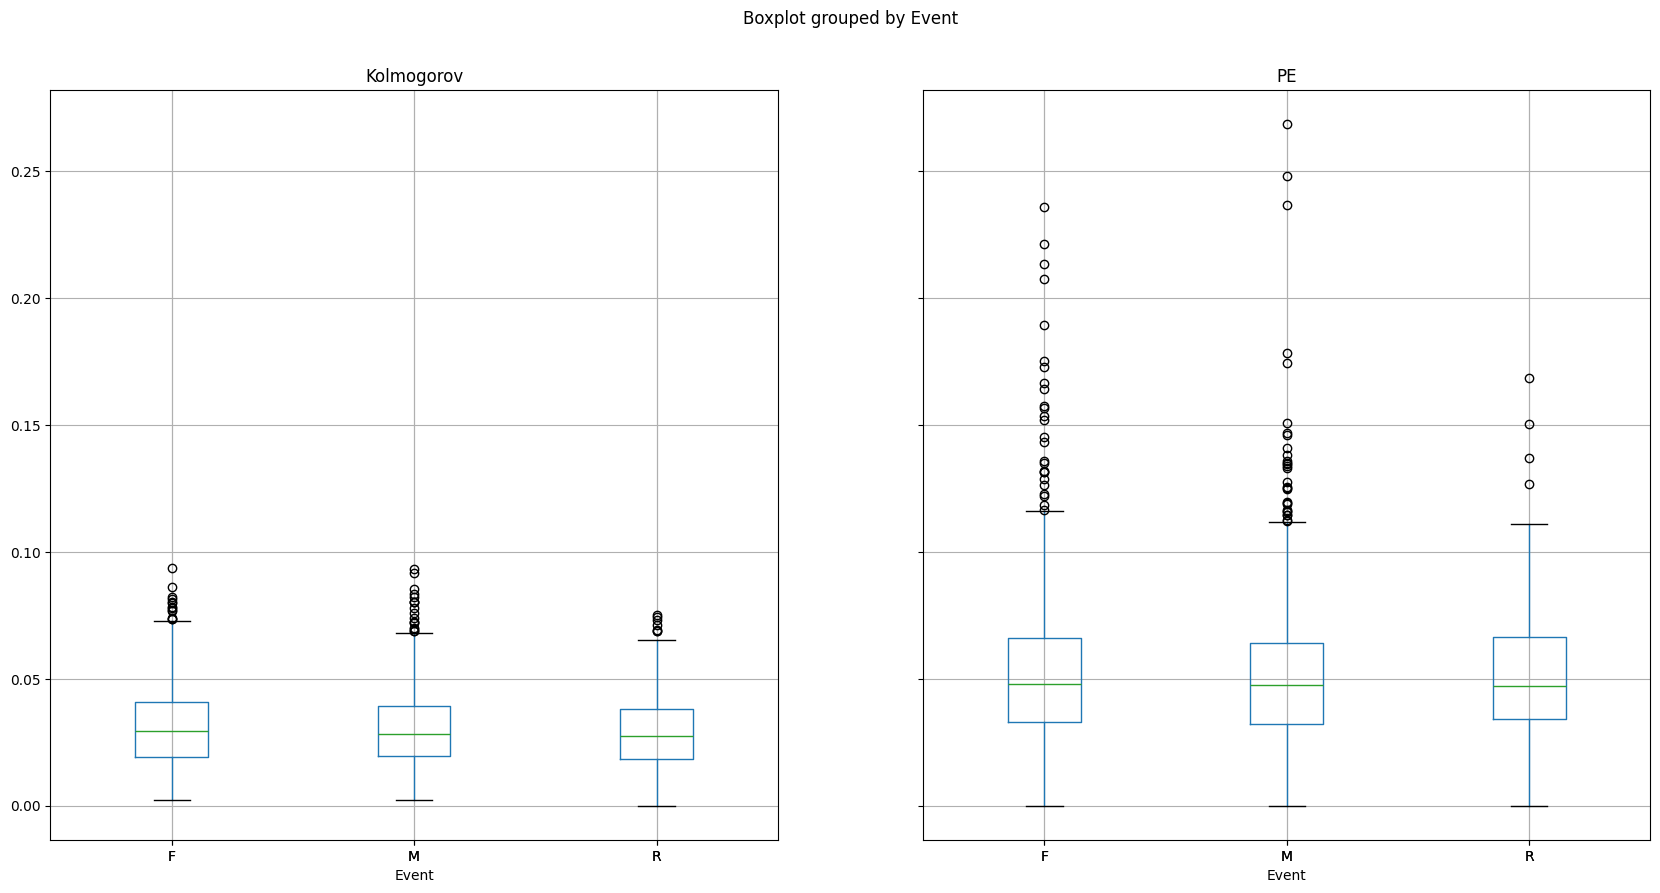

In [31]:
all_data_as_df.boxplot(column=['Kolmogorov', 'PE'], by='Event', figsize=(20,10))
plt.show()

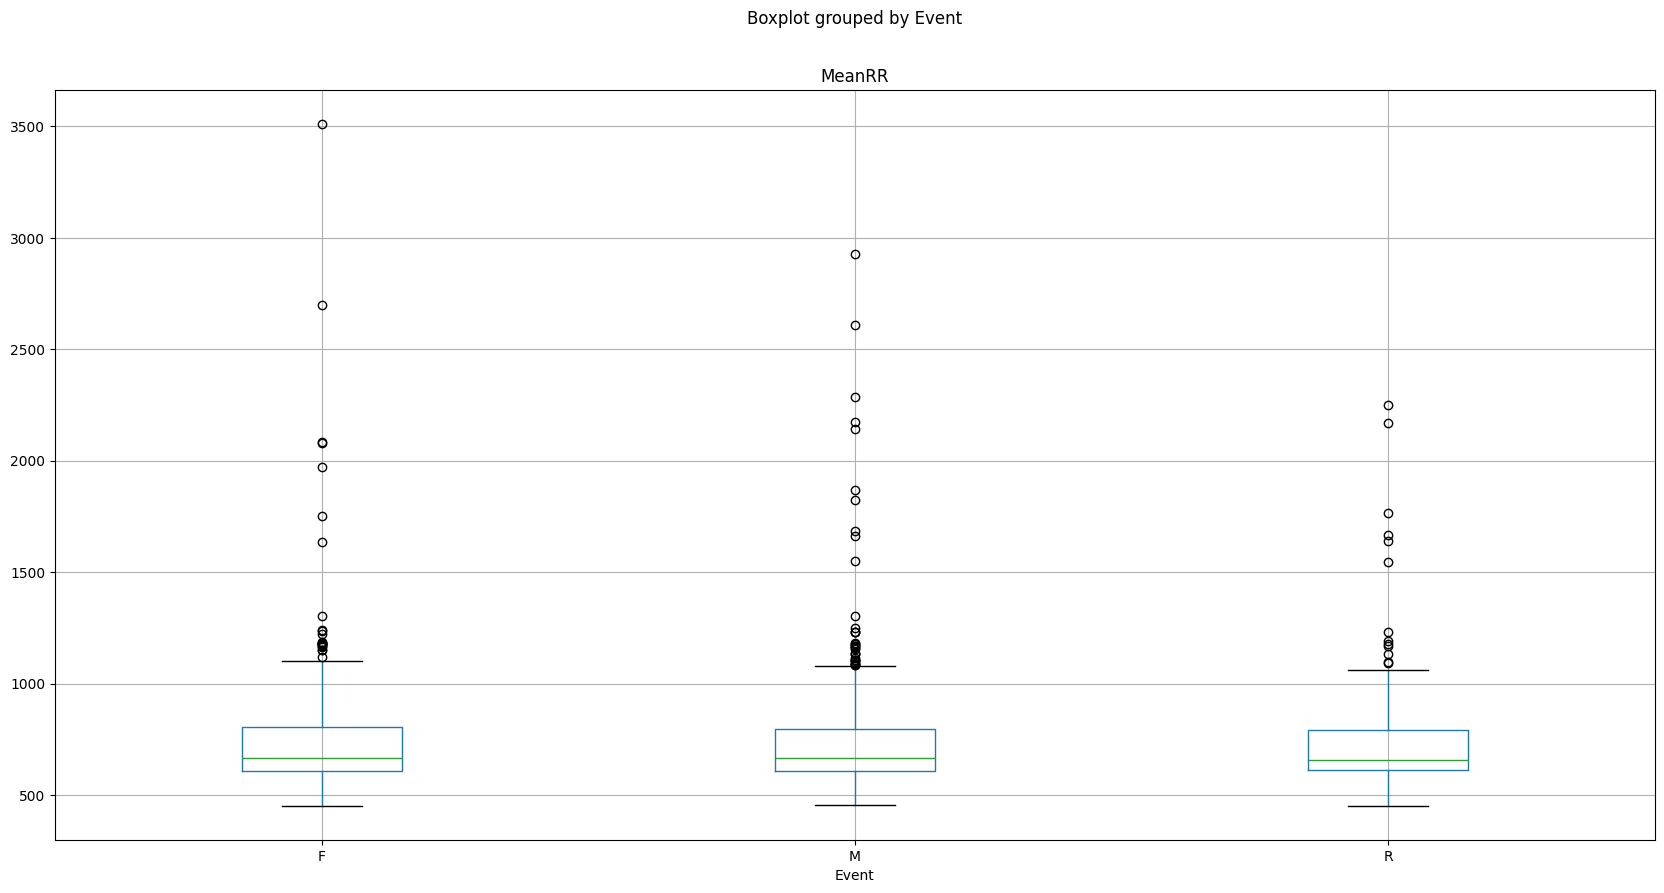

In [32]:
all_data_as_df.boxplot(column=['MeanRR'], by='Event', figsize=(20,10))
plt.show()

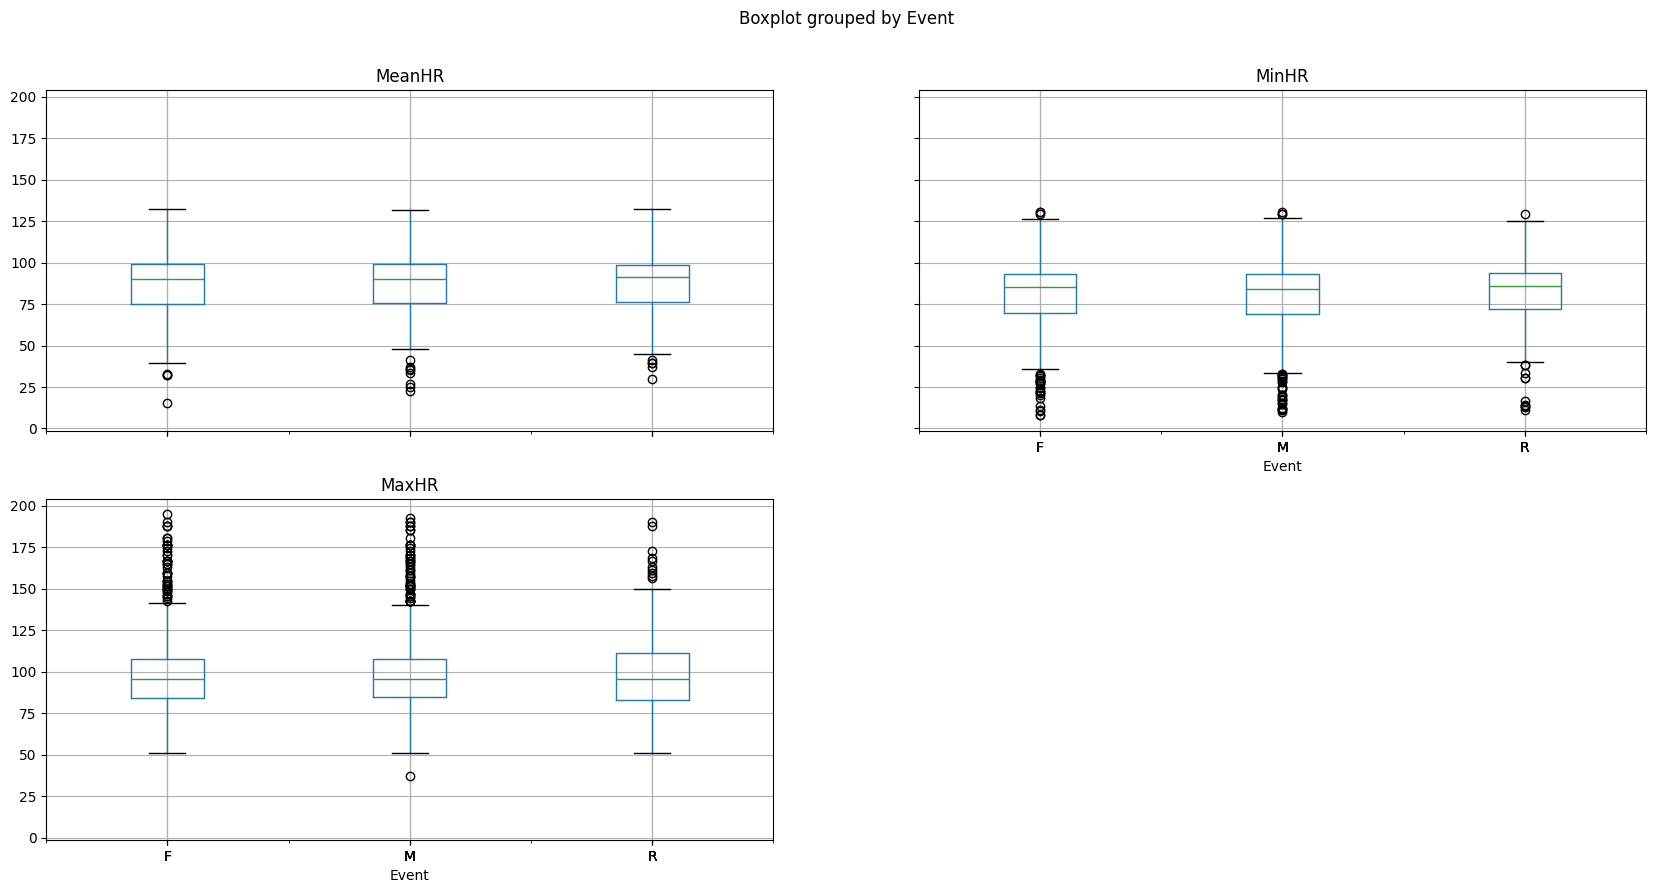

In [33]:
all_data_as_df.boxplot(column=['MeanHR', 'MinHR', 'MaxHR'], by='Event', figsize=(20,10))
plt.show()

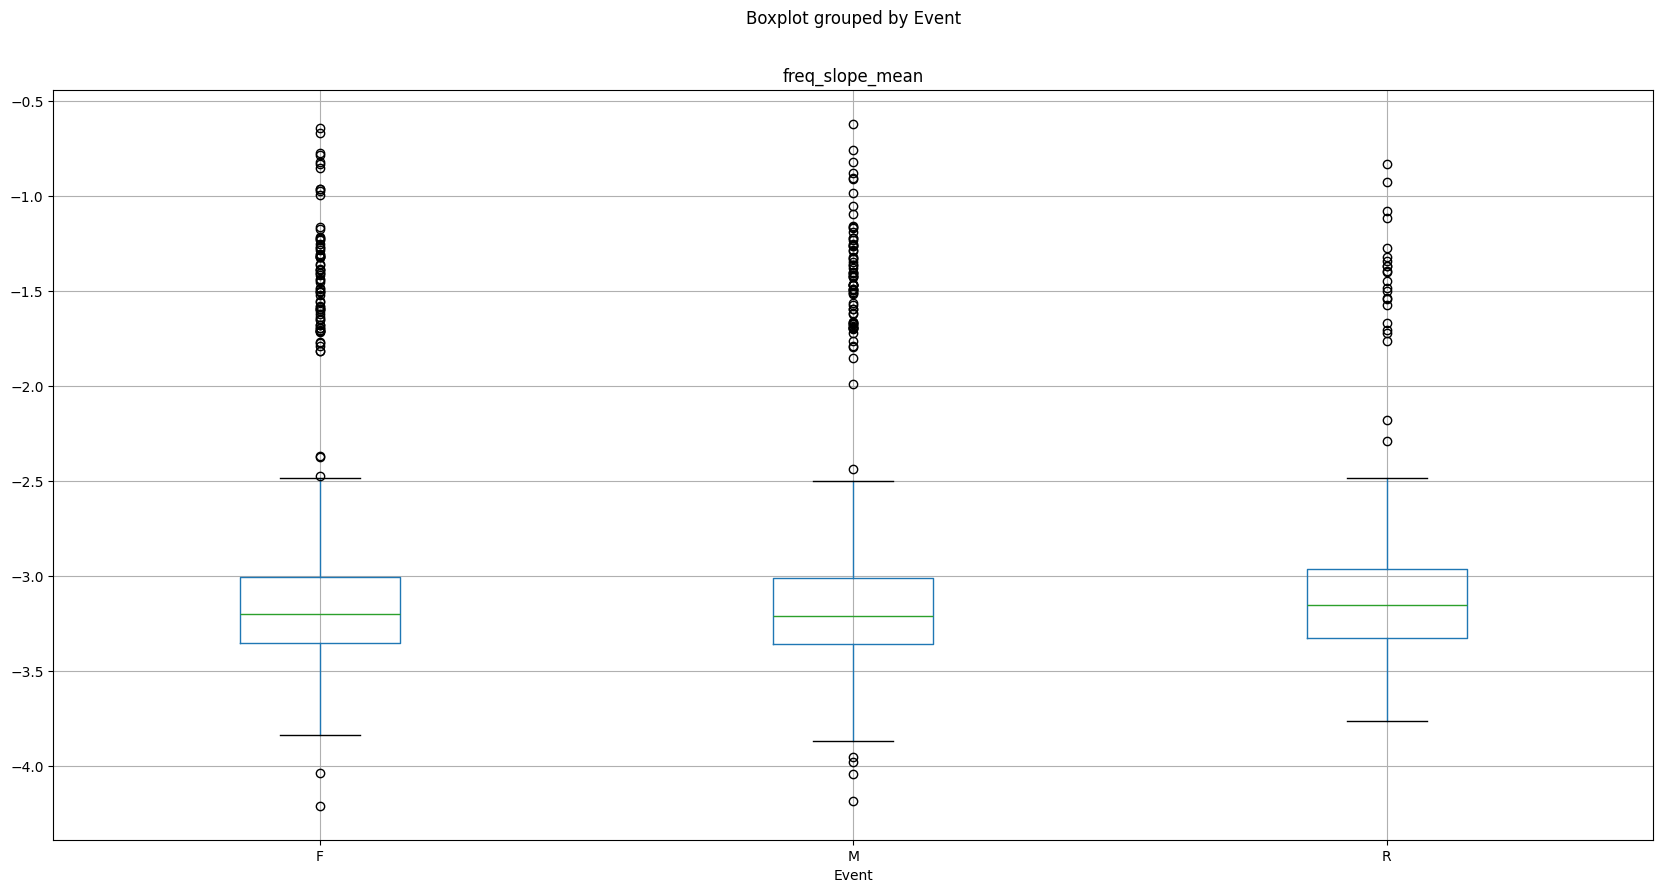

In [34]:
all_data_as_df.boxplot(column=['freq_slope_mean'], by='Event', figsize=(20,10))
plt.show()


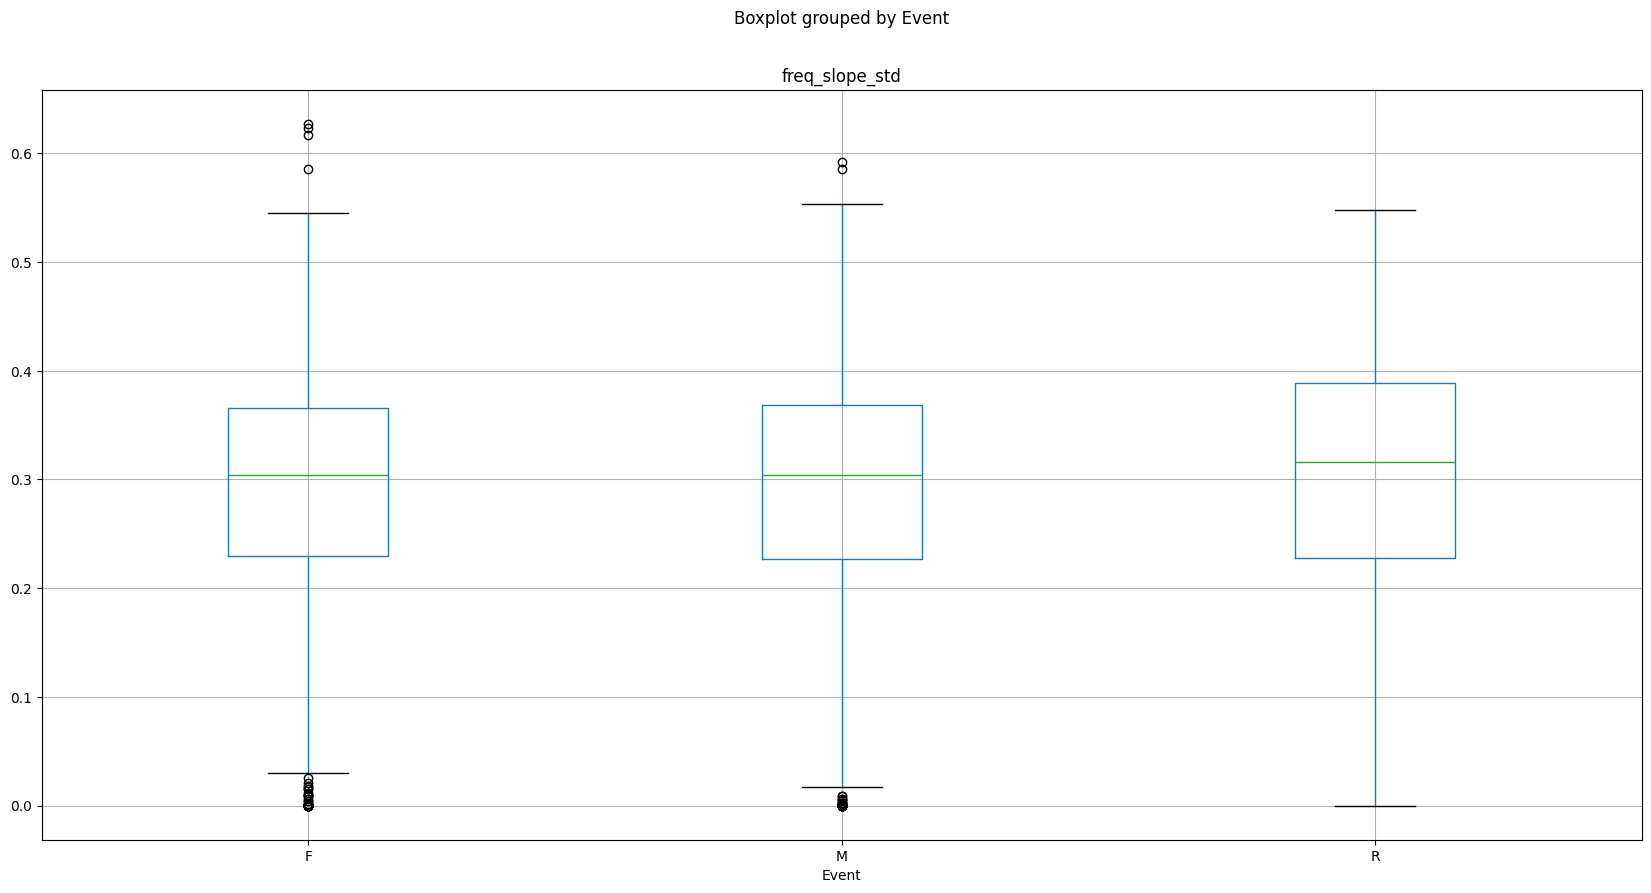

In [35]:
all_data_as_df.boxplot(column=['freq_slope_std'], by='Event', figsize=(20,10))
plt.show()